# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
#display customers that have maximum value in each product category, these customers could be outliers
print "Customers that have maximum value in each product category"
display(data[(data['Fresh'] == max(data['Fresh'])) | 
             (data['Milk'] == max(data['Milk'])) |
             (data['Grocery'] == max(data['Grocery'])) | 
             (data['Frozen'] == max(data['Frozen'])) | 
             (data['Detergents_Paper'] == max(data['Detergents_Paper'])) | 
             (data['Delicatessen'] == max(data['Delicatessen']))])

#display customers that have product category less than 25%
print "Customers that have product category less than 25%"
display(data[(data['Fresh'] <= data['Fresh'].quantile(0.25)) & 
             (data['Milk'] <= data['Milk'].quantile(0.25)) &
             (data['Grocery'] <= data['Grocery'].quantile(0.25)) & 
             (data['Frozen'] <= data['Frozen'].quantile(0.25)) &
             (data['Detergents_Paper'] <= data['Detergents_Paper'].quantile(0.25)) & 
             (data['Delicatessen'] <= data['Delicatessen'].quantile(0.25))])

#display customers that have product category greater than 75%
print "Customers that have product category greater than 75%"
display(data[(data['Fresh'] >= data['Fresh'].quantile(0.75)) & 
             (data['Milk'] >= data['Milk'].quantile(0.75)) &
             (data['Grocery'] >= data['Grocery'].quantile(0.75)) & 
             (data['Frozen'] >= data['Frozen'].quantile(0.75)) &
             (data['Detergents_Paper'] >= data['Detergents_Paper'].quantile(0.75)) & 
             (data['Delicatessen'] >= data['Delicatessen'].quantile(0.75))])

#display customers that have product category greater than 25% and less than 75%, they would represent the general population
print "Customers that have product category greater than 25% and less than 75%"
display(data[(data['Fresh'] >= data['Fresh'].quantile(0.25)) & (data['Fresh'] <= data['Fresh'].quantile(0.75)) & 
             (data['Milk'] >= data['Milk'].quantile(0.25)) & (data['Milk'] <= data['Milk'].quantile(0.75)) &
             (data['Grocery'] >= data['Grocery'].quantile(0.25)) & (data['Grocery'] <= data['Grocery'].quantile(0.75)) & 
             (data['Frozen'] >= data['Frozen'].quantile(0.25)) & (data['Frozen'] <= data['Frozen'].quantile(0.75)) &
             (data['Detergents_Paper'] >= data['Detergents_Paper'].quantile(0.25)) & (data['Detergents_Paper'] <= data['Detergents_Paper'].quantile(0.75)) & 
             (data['Delicatessen'] >= data['Delicatessen'].quantile(0.25)) & (data['Delicatessen'] <= data['Delicatessen'].quantile(0.75))])

Customers that have maximum value in each product category


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
85,16117,46197,92780,1026,40827,2944
86,22925,73498,32114,987,20070,903
181,112151,29627,18148,16745,4948,8550
183,36847,43950,20170,36534,239,47943
325,32717,16784,13626,60869,1272,5609


Customers that have product category less than 25%


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
131,2101,589,314,346,70,310
154,622,55,137,75,7,8
355,190,727,2012,245,184,127


Customers that have product category greater than 75%


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
23,26373,36423,22019,5154,4337,16523
47,44466,54259,55571,7782,24171,6465
181,112151,29627,18148,16745,4948,8550


Customers that have product category greater than 25% and less than 75%


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
55,5264,3683,5005,1057,2024,1130
74,8190,6343,9794,1285,1901,1780
104,14100,2132,3445,1336,1491,548
117,6990,3880,5380,1647,319,1160
139,5387,4979,3343,825,637,929
147,9203,3373,2707,1286,1082,526
198,11686,2154,6824,3527,592,697
297,8090,3199,6986,1455,3712,531
314,10617,1795,7647,1483,857,1233


In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [131, 198, 297]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

# Subtract the mean and median values for each value
print "Chosen samples with mean values subtracted"
display(samples - np.round(data.mean()))

print "Chosen samples with median values subtracted"
display(samples - np.round(data.median()))

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2101,589,314,346,70,310
1,11686,2154,6824,3527,592,697
2,8090,3199,6986,1455,3712,531


Chosen samples with mean values subtracted


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-9899.0,-5207.0,-7637.0,-2726.0,-2811.0,-1215.0
1,-314.0,-3642.0,-1127.0,455.0,-2289.0,-828.0
2,-3910.0,-2597.0,-965.0,-1617.0,831.0,-994.0


Chosen samples with median values subtracted


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-6403.0,-3038.0,-4442.0,-1180.0,-746.0,-656.0
1,3182.0,-1473.0,2068.0,2001.0,-224.0,-269.0
2,-414.0,-428.0,2230.0,-71.0,2896.0,-435.0


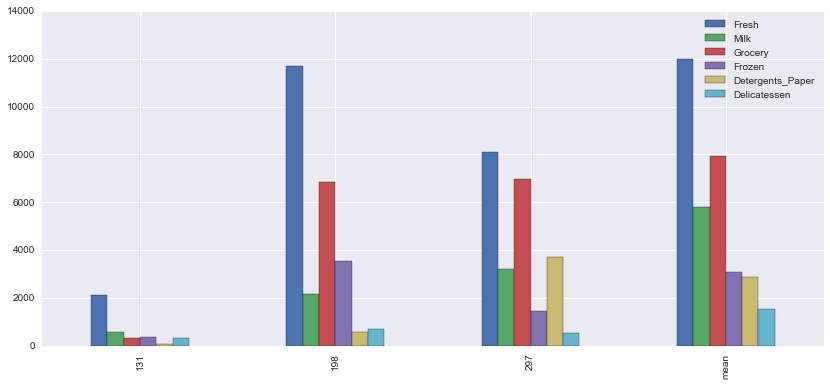

In [5]:
import seaborn as sns
samples_bar = samples.append(data.describe().loc['mean'])
samples_bar.index = indices + ['mean']
_ = samples_bar.plot(kind='bar', figsize=(14, 6))

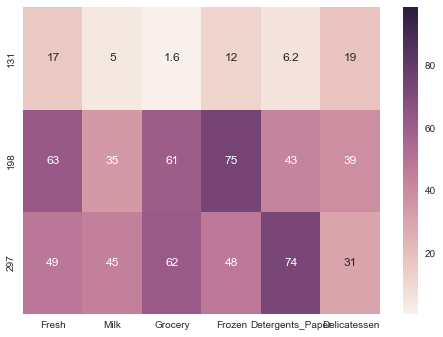

In [6]:
# First, calculate the percentile ranks of the whole dataset
percentiles = data.rank(pct=True)

# Then, round it up, and multiply by 100
percentiles = 100 * percentiles.round(decimals=3)

# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]

# Now, create the heat map using the seaborn library
_ = sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** 
Of the 440 samples, 5 samples have max values for the product category, so these were not selected since these samples could be part of outliers.  I took one sample from the set that had all the values in the 1st percentile and 2 samples from 2nd and 3rd percentile.

Customer '131' has all their product category less than 25% of their corresponding values.  Above table shows that values for all the product category is well below the mean and median.  This customer might represent a small family or individual that doesnt purchase bulk food items.

Customer '198's consumption of Fresh items and Grocery are above average and below 75th percentile.  Above table shows that only the Frozen value is above mean and both Grocery and Frozen value is above median.  Consumption of Detergents is below the mean, this customers purchase pattern shows that it could be a cafe in a busy downtown. 

Customer '297's consumption is similar with high purchase of Fresh and Grocery items.  Above table shows that Detergents purchase is above mean and Grocery and Detergents is above median.  High amount on Detergents suggests this customer could be reseller of products to other customers, rather than being a consumer of these products.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
for product in data.columns:
    new_data = data.drop(product, 1)
    target_data = data[product]

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, target_data, test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=42)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print('Score for predicting {0:}: {1:.2f}'.format(product, score))

Score for predicting Fresh: -0.39
Score for predicting Milk: 0.16
Score for predicting Grocery: 0.68
Score for predicting Frozen: -0.21
Score for predicting Detergents_Paper: 0.27
Score for predicting Delicatessen: -2.25


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer: **
Since there were only 6 features, I removed each feature one by one and calculated the score.  From the prediction score we could see that we could predict the spending habit for 'Fresh', 'Milk', 'Grocery' and 'Detergent_papers', with high score for 'Grocery'.   We could remove 'Grocery' feature and use other features to identify customers' spending habits.

Thus a high R^2 score for Grocery feature, i.e. high correlation of predicting Grocery spending with other features would not be good for identifying customers' spending habit, since the customer would be purchaing other products along with purchasing Grocery.  Low R^2 score or negative value would represent the opposite as we could identify the customers specific behavior just from the one feature.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

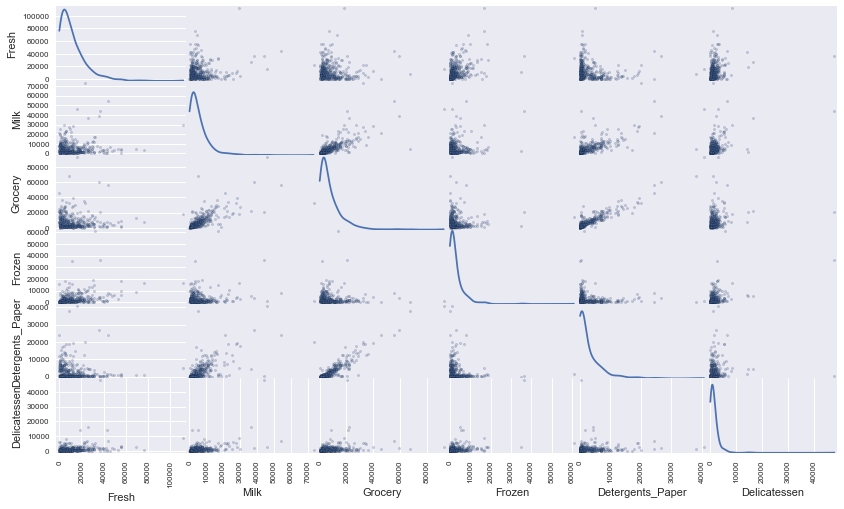

In [8]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000  


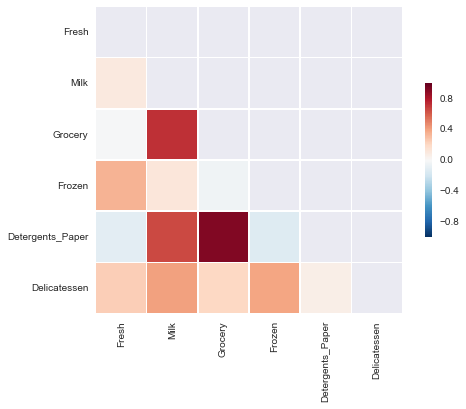

In [9]:
corr = data.corr()
print corr

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5})

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
Above heatmap and correlation values shows that there is a very strong correlation (.92) between Grocery and Detergents_paper and light correlation between Milk and Grocery (.72), Milk and Detergents_Paper (.66). All data are right skewed and all products have outliers.   Since there is a strong correlation of Detergents_paper with Grocery and going by the score from previous section we could safely drop Grocery feature in our anaysis.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

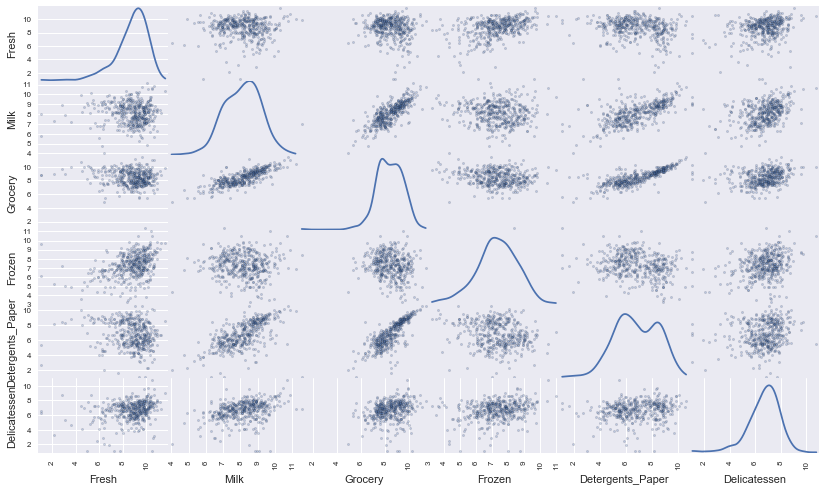

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000 -0.019834 -0.132713  0.383996         -0.155871   
Milk             -0.019834  1.000000  0.758851 -0.055316          0.677942   
Grocery          -0.132713  0.758851  1.000000 -0.164524          0.796398   
Frozen            0.383996 -0.055316 -0.164524  1.000000         -0.211576   
Detergents_Paper -0.155871  0.677942  0.796398 -0.211576          1.000000   
Delicatessen      0.255186  0.337833  0.235728  0.254718          0.166735   

                  Delicatessen  
Fresh                 0.255186  
Milk                  0.337833  
Grocery               0.235728  
Frozen                0.254718  
Detergents_Paper      0.166735  
Delicatessen          1.000000  


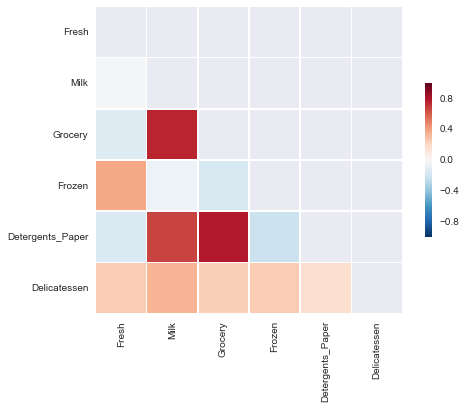

In [11]:
corr = log_data.corr()
print corr

sns.heatmap(corr, mask=mask, 
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5})

After feature scaling above heatmap and correlation values shows that there is a light correlation (.75) between Grocery and Milk and light correlation between Milk and Detergents (.67) and Detergents and Grocery (.79).

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [12]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7.650169,6.378426,5.749393,5.846439,4.248495,5.736572
1,9.366147,7.675082,8.828201,8.168203,6.383507,6.546785
2,8.998384,8.070594,8.851663,7.282761,8.219326,6.274762


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
# For each feature find the data points with extreme high or low values
outlier_index = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    # Collect the indexes to determine outliers
    outlier_index.append(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist())
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
      
outlier_index = sum(outlier_index, [])
outlier_index_counts = dict((x, outlier_index.count(x)) for x in set(outlier_index))
print('There are {0:} unique outliers'.format(len(outlier_index_counts)))
outliers = sorted([k for (k, v) in outlier_index_counts.items() if v >= 2])
for i in outliers:
    print('Data index:{0:} appears {1:} times'.format(i, outlier_index_counts[i]))
    
# OPTIONAL: Select the indices for data points you wish to remove
print outliers

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


There are 42 unique outliers
Data index:65 appears 2 times
Data index:66 appears 2 times
Data index:75 appears 2 times
Data index:128 appears 2 times
Data index:154 appears 3 times
[65, 66, 75, 128, 154]


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer: **
There were 42 outliers, around 10% of the dataset have outliers, instead of removing all these outliers and reducing the size of our dataset, I identified data points that have outliers in more than one feature. 4 data points have 2 outlier features and one data point has 3 outlier features, since this list is small we could remove these 5 data points [65, 66, 75, 128, 154] from our dataset.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

             Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4430 -0.1675  0.4014   0.4381 -0.1782   
Dimension 2              0.2638  0.6859  0.1672   0.0707  0.5005   
Dimension 3              0.1231 -0.6774  0.0402  -0.0195  0.3150   
Dimension 4              0.1012 -0.2043  0.0128   0.0557  0.7854   
Dimension 5              0.0485  0.0026 -0.7192  -0.3554  0.0331   
Dimension 6              0.0204 -0.0292  0.5402  -0.8205 -0.0205   

             Detergents_Paper  Delicatessen  
Dimension 1            0.7514        0.1499  
Dimension 2            0.0424        0.4941  
Dimension 3           -0.2117        0.6286  
Dimension 4            0.2096       -0.5423  
Dimension 5            0.5582        0.2092  
Dimension 6            0.1824       -0.0197  


array([ 0.44302505,  0.70681723,  0.82988103,  0.93109011,  0.97959207,  1.        ])

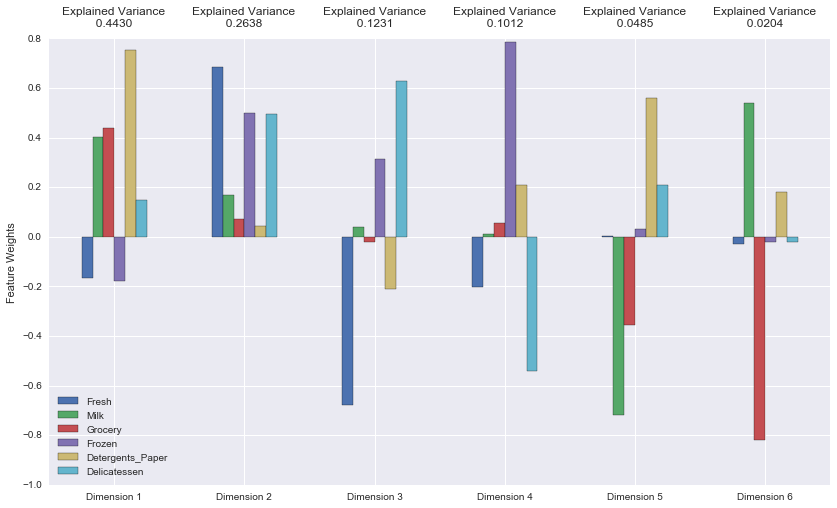

In [14]:
from sklearn.decomposition import PCA
# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)
print pca_results

np.cumsum(pca.explained_variance_ratio_)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer: **
First and second principal component explain 44.3% and 26.38% respectively of the variance with a combined total of 70% of the variance in the data.  First four principal components combined explain 93.1% of the variance, leaving 7% of the variance to be explained by the rest.

Interpretation of the principal components is based on finding which variables are more strongly correlated with each component, i.e., which of these numbers are large in magnitude, the farthest from zero in either positive or negative direction.  Which numbers we consider to be large or small is of course a subjective decision.  We need to determine at what level the correlation value will be of importance, lets consider correlation value above 0.5 to be deemed important.  

Going by that criteria, first pricipal component is strongly correlated with one of the original variables.  The first principal component increases with increasing Detergents values, this suggestat that when Detergents value increases, Milk, Grocery and Delicatessen would increase as well.  This component can be viewed as a measure of Detergents spending, based on the correlation of .75 that this principal component is primarily a measure of the Detergents spending.

The second principal component increases with increasing Fresh, Frozen and Delicatessen values.  This suggests that these 3 criteria vary together.  If one increases, then the remaining ones tend to as well.  This component can be viewed as a measure of Fresh, Frozen and Delicatessen spending.

The third principal component increases with decreasing Fresh values and increasing Delicatessen values.  This suggests that customers who buy Delicatessen also tend to spend less on Fresh.

The fourth principal component increases with increasing Frozen values and decreasing Delicatessen values.  This suggests that customer who spend a lot on Frozen items also tend to spend less on Delicatessen.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [15]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-3.4998,-2.5716,0.2112,-1.1215,0.5463,0.8957
1,-0.6058,0.6931,-0.1705,0.5478,-0.0380,-0.6545
2,1.1213,0.0090,-0.7445,0.4661,0.6067,-0.0910


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [16]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# Apply a PCA transformation the log data that includes outliers
reduced_data_with_outliers = pca.transform(log_data)

# Create a DataFrame for the log data that includes outliers
reduced_data_with_outliers = pd.DataFrame(reduced_data_with_outliers, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-3.4998,-2.5716
1,-0.6058,0.6931
2,1.1213,0.0090


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer: Needs revision**
K-Means clustering is a popular cluster analysis method in data mining and much easier to understand, it uses eculidean distance as a metric and variance as a measure of cluster scatter whereas the Gaussian misture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.  GMM offers different options to constrain the covariance of the difference classes estimated: speherical, diagonal, tied or full covariance.

K-Means could be appliced to very large dataset with medium clusters, but GMM is not scalable compared with K-Means.  When the number of clusters increases we should look at other clustering algorithms.  

I would be using both KMM and GMM clustering algorithm to understand their implementation and usage. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# TODO: Apply your clustering algorithm of choice to the reduced data 

optimal_score = 0.0
for i in range(2,7):
    clusterer = KMeans(n_clusters=i, random_state=42).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2']))

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')
    print i, score
    if optimal_score < score:
        optimal_clusters = i
        optimal_score = score
        
print optimal_clusters, optimal_score

clusterer = KMeans(n_clusters=optimal_clusters, random_state=42).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_
print "Cluster centers with K-Means", centers

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2']))

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')

print("Mean silhouette coefficient with {0:} clusters using KMeans: {1:}".format(optimal_clusters, score))

2 0.426281015469
3 0.39689092645
4 0.331841276009
5 0.349997797526
6 0.365885220633
2 0.426281015469
Cluster centers with K-Means [[-1.49093664  0.10743169]
 [ 2.17322969 -0.15659534]]
Mean silhouette coefficient with 2 clusters using KMeans: 0.426281015469


In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# TODO: Apply your clustering algorithm of choice to the reduced data 

clusterer_with_outliers = KMeans(n_clusters=2, random_state=42).fit(reduced_data_with_outliers)

# TODO: Predict the cluster for each data point
preds_with_outliers = clusterer_with_outliers.predict(reduced_data_with_outliers)

# TODO: Find the cluster centers
centers_with_outliers = clusterer_with_outliers.cluster_centers_
print "Cluster centers with K-Means and outliers", centers_with_outliers

# TODO: Predict the cluster for each transformed sample data point
sample_preds_with_outliers = clusterer_with_outliers.predict(pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2']))

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score_with_outliers = silhouette_score(reduced_data_with_outliers, clusterer_with_outliers.labels_, metric='euclidean')

print "Mean silhouette coefficient with 2 clusters using KMeans with outliers", score_with_outliers

Cluster centers with K-Means and outliers [[ 2.19915559 -0.29918725]
 [-1.51975146  0.11264451]]
Mean silhouette coefficient with 2 clusters using KMeans with outliers 0.419249062681


In [20]:
from sklearn.mixture import GMM
# Apply GMM clustering algorithm to reduced data 

clusterer_GMM = GMM(n_components=2, random_state=42).fit(reduced_data)

# Predict the cluster for each data point
preds_GMM = clusterer_GMM.predict(reduced_data)

# Find the cluster centers
centers_GMM = clusterer_GMM.means_
print "Cluster centers with GMM", centers_GMM

# Predict the cluster for each transformed sample data point
sample_preds_GMM = clusterer_GMM.predict(pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2']))

# Calculate the mean silhouette coefficient for the number of clusters chosen
score_GMM = silhouette_score(reduced_data, preds_GMM)
print "Mean silhouette coefficient with 2 clusters using GMM", score_GMM

Cluster centers with GMM [[-1.30917139  0.1428472 ]
 [ 1.63707508 -0.17862565]]
Mean silhouette coefficient with 2 clusters using GMM 0.411818864386


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer: **
Scores for cluster size 2 to 6 was calculated and 2 clusters had the maximum score of .42 and 3 clusters was closer and values for other cluster sizes lower than 2 clusters.

Along with K-Means, I used GMM to calculate the cluster size and score.  The resulting clusters were same 2 clusters with GMM producing slightly lower score.  Also using the data set including the outliers does not change the score much.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

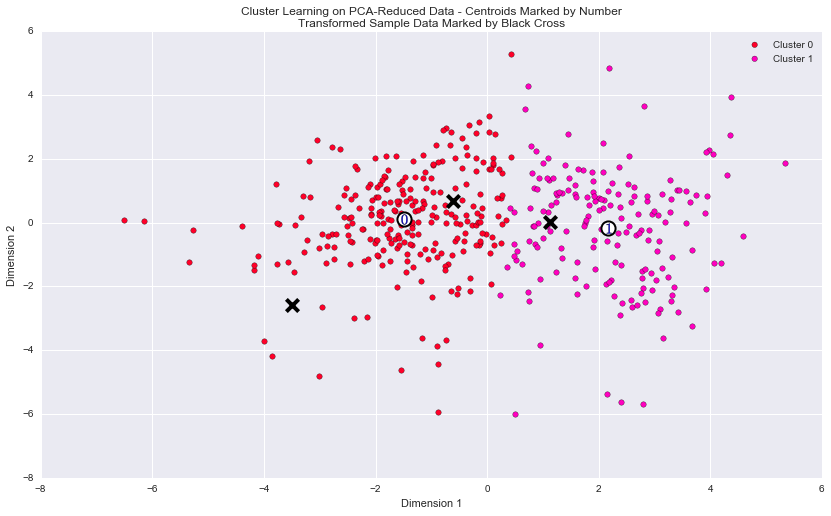

In [21]:
# Display the results of the clustering from K-Means implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

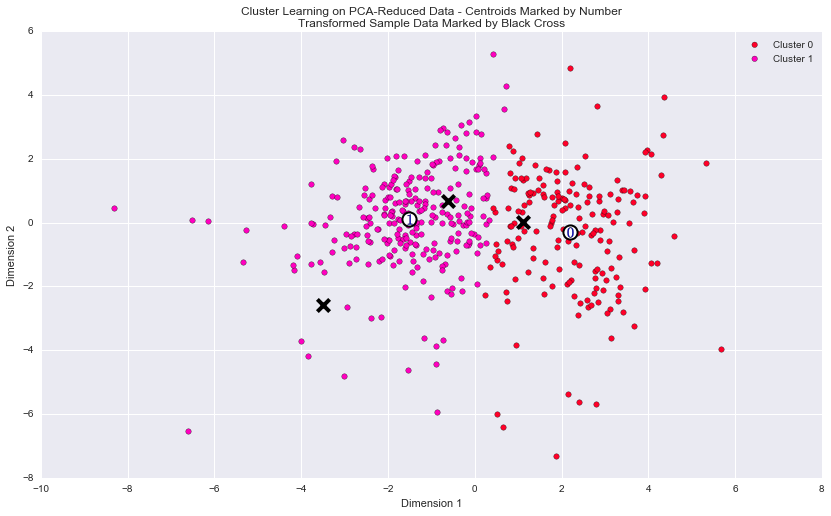

In [22]:
# Display the results of the clustering from K-Means implementation
rs.cluster_results(reduced_data_with_outliers, preds_with_outliers, centers_with_outliers, pca_samples)

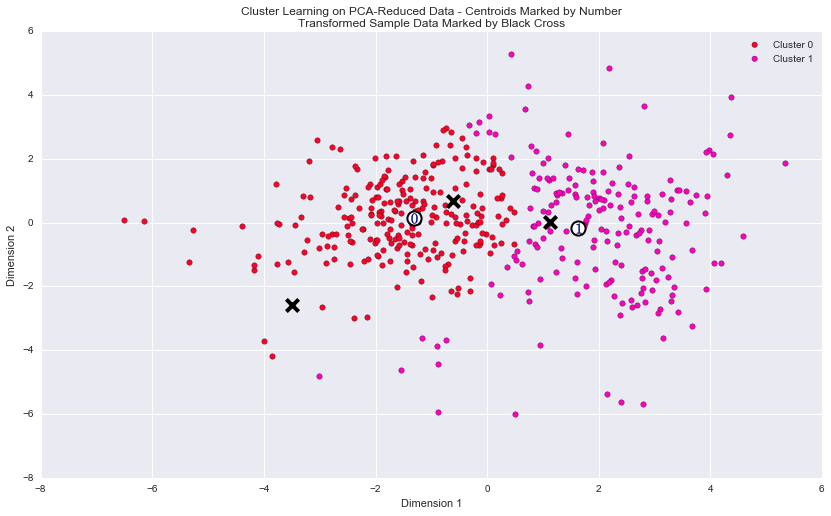

In [23]:
# Display the results of the clustering from GMM implementation
rs.cluster_results(reduced_data, preds_GMM, centers_GMM, pca_samples)

Above plots show that the cluster center has moved slightly for K-Means when outliers are included, since we have removed only 5 datapoints they seem to have very small change.

Cluster centers with K-Means              (-1.49093664, 0.10743169) (2.17322969, -0.15659534)

Cluster centers with K-Means and outliers (-1.51975146, 0.11264451) (2.19915559, -0.29918725)

Cluster centers with GMM                  (-1.30917139, 0.1428472)  (1.63707508, -0.17862565)

Using GMM there is small shift in the centers for the clusters.

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


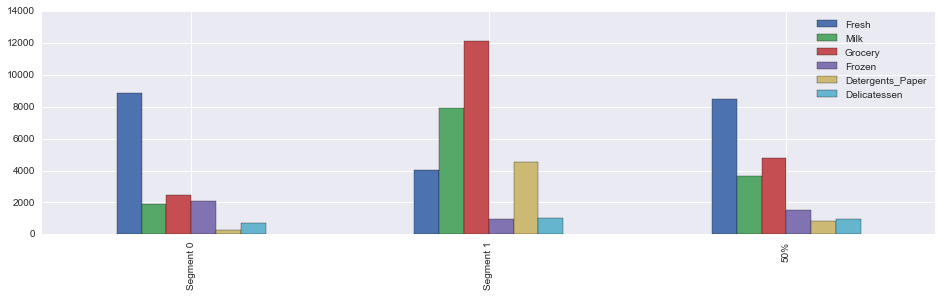

In [24]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

# Add median values from the data to true centers
true_centers = true_centers.append(data.describe().ix['50%'])

# visualize the cluster centers
true_centers.plot(kind = 'bar', figsize=(16,4))

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
Above bar plot shows where how both customer segments are represented in comparison with the median value for the dataset. 
Featuers for each segment have contrasting spending behaviors, Segment 0 has customers who spend close to median for Fresh and very less on Detergents. 

Segment 1 has customers who spend a lot on other items namely: Milk, Grocery and Detergents, there spending pattern is much more than the median values for these features in the dataset.  

These two segements could represent 2 different customer base, with Segment 0 representing individual families and Segment 1 representing business like restaurants.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [25]:
print "Display the predictions using K-Means Model"
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

print "\nDisplay the predictions using GMM Model"
for i, pred in enumerate(sample_preds_GMM):
    print "Sample point", i, "predicted to be in Cluster", pred, "with probability:", clusterer_GMM.predict_proba(pca_samples)[i]

Display the predictions using K-Means Model
Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1

Display the predictions using GMM Model
Sample point 0 predicted to be in Cluster 0 with probability: [ 0.95822533  0.04177467]
Sample point 1 predicted to be in Cluster 0 with probability: [ 0.8352691  0.1647309]
Sample point 2 predicted to be in Cluster 1 with probability: [ 0.37637509  0.62362491]


**Answer:**
I predicted Customer '131' to represent a small family or a individual, this has been confimed with being assigned to Cluster 0 which represents customers who spend on Fresh and Frozen items.  With GMM model, this customer is predicted to be in Cluster 0 with 95% probability.

For Customer '198's to be cafe in a busy downdown, since this customer is assigned to Cluster 0, it looks like this customer is a large family that consumes a lot of Fresh and Frozen items.  With GMM model, this customer is predicted to be in Cluster 0 with 83% probability.

Customer '297' has been predicted correctly with Cluster 1, which uses high Grocery and Detergents.  With GMM model, this customer is predicted to be in Cluster 2 with 62% probability.

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**
Above analysis shows that there are two clusters of customers, if we had more data we could probably determine if we could create 3 clusters.  With above analysis we could run a A/B test to determine which cluster would benefit from change in delivery service.  Instead of changing the delivery service for all the customers, we could select a group of customers from each cluster and validate the feedback provided by the customers on which schedule is beneficial.

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the clustering data you've found to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**
Cluster output from the model could be used as another feature to predict how much other products would be purchased, like Cluster 0 would be purchasing less Detergents and Delicatessen, and Cluster 1 would be purchainsg less Frozen and Fresh products.  Since the model has also provided the centers of the cluster we could use the distance to the nearest cluster as a another feature, this would add another feature which provides how much afinity it has towards the assigned cluster. 

These quantities could be calculated and used after taking a domain experts knowledge on how these new synthetic features affect the model and the business analytics we are trying to perform with this dataset.  These are ideas that could be explored.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

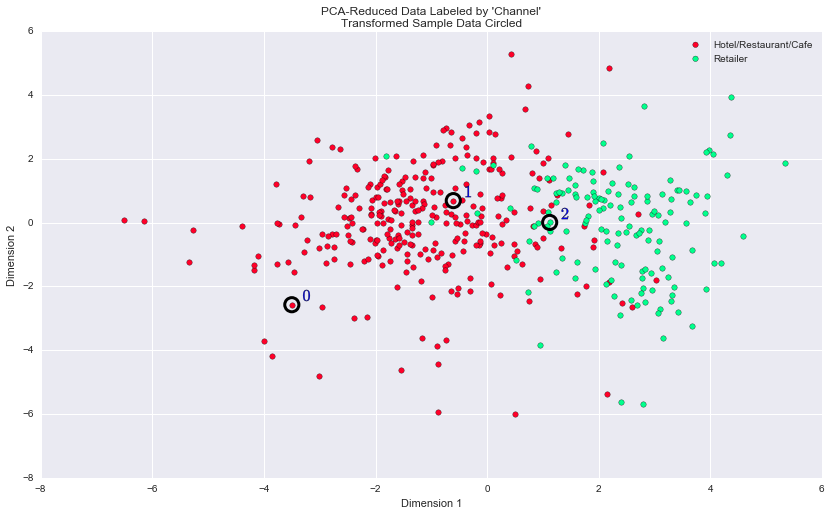

In [26]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
Above clustering result seems to be consistent with earlier analysis of identifying segments, there are 2 groups of customers identified as Hotel/Restaurance/Cafes and Retailers, they are not clearly segregated, there some customers mixed up in both the groups.  PCA and K-Means has provided good mechanism to identifying the key features that differentiate the customer base and segment the customers very well.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.